In [110]:
!pip install s3fs
#%%time
from astropy.io import fits
import s3fs
import matplotlib.pyplot as plt

!pip install boto3
import boto3

!pip install aplpy
import aplpy

!pip install astroquery --pre --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 235.9 MB/s  0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.39.11
    Uninstalling botocore-1.39.11:
      Successfully uninstalled botocore-1.39.11━ 0/3 [botocore]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [boto3]32m1/3 [s3transfer]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.24.1 requires botocore<1.39.12,>=1.39.9, but you have botocore 1.40.21 which is incompatible.


In [11]:
# Now beginning my own notes:

# the HEASARC page describing this process is found here:


# # for a link to the heasarc archive such as this one:
# https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/5/4475/primary/acisf04475N004_full_img2.fits.gz
# # which points to a Chandra image

# # the corresponding s3 bucket link would be this one:
# s3://nasa-heasarc/chandra/data/byobsid/5/4475/primary/acisf04475N004_full_img2.fits.gz
# #or
# https://nasa-heasarc.s3.amazonaws.com/chandra/data/byobsid/5/4475/primary/acisf04475N004_full_img2.fits.gz


# so the distinct missions have their own directories
# The FTP directories can be found here: https://heasarc.gsfc.nasa.gov/FTP/

# where if you click into each, you will typically find ReadMe files describing the substructure of the directories
# For example, if you click down to chandra/data/byobsid/, you will find a ReadMe describing the naming/structure of the following subdirectories


# Another resource from the heasarc Cloud page:
# https://heasarc.gsfc.nasa.gov/docs/archive/cloud/heasarc_cloud_tutorial.html
# which is a tutorial for data access from the Cloud




# We can also access data through the various astroquery tools

Let's say we are interested exploring HEASARC using astroquery

In [38]:
#first we'll import the Heasarc module from astroquery
from astroquery.heasarc import Heasarc

# Next, we're going to check for the available catalogs. For this we will use the .list_catalogs() function within the Heasarc module
# .list_catalogs() takes two inputs:
# > "master", which can be assigned "True" or "False"
# > "keywords"

# If we want to get a full list of available archives within the HEASARC we can run the following simple lines:
catalogs = Heasarc.list_catalogs(master=False)
print("Total number of Available Catalogs in HEASARC: "+str(len(catalogs)))
print("Available Catalogs in HEASARC: ")
catalogs.pprint(align='<')
# where we have used 'master=False' to make sure we retrieve all catalogs, not just the 'master' catalogs
# Note, this is also the default value

# the output provided in catalogs provides us with the names and descriptions of all available high energy catalogs within the HEASARC

Total number of Available Catalogs in HEASARC: 1027
Available Catalogs in HEASARC: 
            name                               description                    
--------------------------- --------------------------------------------------
"first"                     Faint Images of the Radio Sky at Twenty cm (FIRST)
a1                          HEAO 1 A1 X-Ray Source Catalog                    
a1point                     HEAO 1 A1 Lightcurves                             
a2lcpoint                   HEAO 1 A2 Pointed Lightcurves                     
a2lcscan                    HEAO 1 A2 Scanned Lightcurves                     
a2led                       HEAO 1 A2 LED Catalog                             
a2pic                       HEAO 1 A2 Piccinotti Catalog                      
a2point                     HEAO 1 A2 Pointing Catalog                        
a2rtraw                     HEAO 1 A2 Raw Rates                               
a2specback                  HEAO 1 A2 Spectra B

### 1027 available catalogs! That's a lot of possibilities, and it is a lot of information to parse through. Perhaps you have a sense for the data you're looking for. Let's say you're looking instead for data in the "master" catalogs list, and you want to check for the names of the master catalogs you're interested in. 

We can get the full list of master catalogs by setting "master=True" in our previous call like so:

In [39]:
catalogs = Heasarc.list_catalogs(master=True)
print("Total number of Master Catalogs in HEASARC: "+str(len(catalogs)))
print("Master Catalogs in HEASARC: ")
catalogs.pprint(align='<')


Total number of Master Catalogs in HEASARC: 25
Master Catalogs in HEASARC: 
   name                             description                         
---------- -------------------------------------------------------------
ascamaster ASCA Master Catalog                                          
burcbmastr BurstCube Master Observation Catalog                         
chanmaster Chandra Observations                                         
cmbmaster  LAMBDA Cosmic Microwave Background Experiments Master Catalog
erassmastr eROSITA All-Sky Survey Master Catalog                        
erosmaster eROSITA Observations Master Catalog                          
euvemaster EUVE Archive and Observation Log                             
exomaster  EXOSAT Master Observation List                               
halomaster HaloSat Master Catalog                                       
hitomaster Hitomi Master Catalog                                        
...        ...                                  

### Here we can now see the names for all of the master catalogs. For example, the Chandra master catalog is referred to as `chanmaster`, the Swift master catalog is referred to as `swiftmastr`, and the XMM-Newton master catalog is referred to as `xmmmaster`

### Great! Now we can find the names all all the master catalogs, and all of the 1027 catalogs.... but this still a bit hard to parse. What if you just want to find catalogs for specific missions? Instead of reading through all of these lists line by line, let's use the `keyword`  option in .list_catalogd(). Let's try looking for anything the name "swift" in the title:

In [40]:
# and instead of limiting to the master catalogs, we'll look across all of the catalogs
catalogs = Heasarc.list_catalogs(master=False, keywords="swift")
print("Total number of Master Catalogs in HEASARC: "+str(len(catalogs)))
print("Master Catalogs in HEASARC: ")
catalogs.pprint(align='<')

Total number of Master Catalogs in HEASARC: 27
Master Catalogs in HEASARC: 
   name                              description                           
---------- ----------------------------------------------------------------
sacshpscat Swift AGN & Cluster Survey (SACS) Hard-Band (2-10 keV) Point Sou
sacssescat Swift AGN & Cluster Survey (SACS) Soft-Band (0.5-2 keV) Extended
sacsspscat Swift AGN & Cluster Survey (SACS) Soft-Band (0.5-2 keV) Point So
sacstpscat Swift AGN & Cluster Survey (SACS) Total-Band (0.2-10 keV) Point 
sixsrvycat Swift-INTEGRAL X-Ray (SIX) Survey Catalog                       
swbat105m  Swift-BAT 105-Month All-Sky Hard X-Ray Survey                   
swbat157m  Swift-BAT 157-Month All-Sky Hard X-Ray Survey                   
swbatagn60 Swift BAT 60-Month Survey of Active Galactic Nuclei Catalog     
swbatmontr Swift BAT Transient Monitoring Catalog                          
swbatsfxt  Swift BAT 100-Month Supergiant Fast X-Ray Transient Catalog     
...        .

In [41]:
#for i in catalogs['name']:
#    print(i)

### for the `keywords` argument, we can include multiple keywords to search for catalogs that include data products from multiple facilities

Your input to `keywords` can take two forms: 
- You can separate your multiple keywords with a space, a la `"xmm chandra"`, where the space acts as `AND`, and thus this corresponds to `xmm AND chandra`
- You can provide a python list, a l `["xmm", "chandra"]`, where the comma corresponds to an OR relation between the keywords, and thus this corresponds to `xmm OR chandra`.

### Let's look consider this example: 

In [42]:
# here we will find catalogs with swift AND chandra data
catalogs = Heasarc.list_catalogs(master=False, keywords="xmm chandra")
print("Total number of Master Catalogs in HEASARC: "+str(len(catalogs)))
print("Master Catalogs in HEASARC: ")
catalogs.pprint(align='<')

Total number of Master Catalogs in HEASARC: 4
Master Catalogs in HEASARC: 
   name                              description                           
---------- ----------------------------------------------------------------
gmrt1hxcsf Giant Metrewave Radio Telescope 1h XMM/Chandra Survey Fld 610-MH
ic10xmmcxo IC 10 XMM-Newton and Chandra X-Ray Point Source Catalog         
ros13hrcxo ROSAT/XMM-Newton 13-hour Field Chandra X-Ray Source Catalog     
xmmomcdfs  XMM-Newton Optical Monitor Chandra Deep Field-South UV Catalog  


In [43]:
# whereas here we will look for catalogs containing swift data products OR chandra data products:
# here we will find catalogs with swift AND chandra data
catalogs = Heasarc.list_catalogs(master=False, keywords=["xmm", "chandra"])
print("Total number of Master Catalogs in HEASARC: "+str(len(catalogs)))
print("Master Catalogs in HEASARC: ")
catalogs.pprint(align='<')


Total number of Master Catalogs in HEASARC: 293
Master Catalogs in HEASARC: 
   name                              description                           
---------- ----------------------------------------------------------------
acceptcat  Archive of Chandra Cluster Entropy Profile Tables (ACCEPT) Catal
aegisx     AEGIS-X Chandra Extended Groth Strip X-Ray Point Source Catalog 
aegisxdcxo AEGIS-X Deep Survey Chandra X-Ray Point Source Catalog          
agnsdssxm2 Sloan Digital Sky Survey/XMM-Newton Type1 AGN X-Ray and Radio Pr
agnsdssxmm Sloan Digital Sky Survey/XMM-Newton AGN Spectral Properties Cata
aknepdfcxo Akari North Ecliptic Pole Deep Field Chandra X-Ray Point Source 
alfperxmm  Alpha Per Open Cluster XMM-Newton X-Ray Source Catalog          
arcquincxo Arches and Quintuplet Clusters Chandra X-Ray Point Source Catalo
atcdfsss82 Australia Telescope Chandra Deep Field-South and SDSS Stripe 82 
axis       AXIS XMM-Newton Source Catalog                                  
...        

### So now we know how to locate catalogs, and we know what keywords to use when trying to locate our data. This will come in handy during our next steps

### Now we will work on actually finding some datasets and learn how to query data sets in practice.

### To do so, we will need a few more tools at our disposal. We take advantage of astropy.heasarc's .query_region() function as well as astropy.cordinates' SkyCoord function

In [44]:
from astropy.coordinates import SkyCoord

In [45]:
# Our main goal here is to be able to query HEASARC and seach for datasets. One way to 
# do this is through the convenient `query_region()` function with astropy.Heasarc
# This function takes as input the:
# - position of the source in question
# - catalog choice
# - search radius (a default is adopted depending on your adopted mission catalog)
# - spatial search option (default is `cone`)
# and it also allows you to use polygon regions for searches

# Let's say you have a particular object in mind that you are interested in studying at 
# high energies; for example, let's say you are interested in NGC 4945. 

# we can take advantage of SkyCoord.from_name(), which -- assuming the name you pass as \
# a string can be resolved by astropy -- will return the coordinates of the object in \
# question. 

# This is important, as we need the cordinates of our object for query_region().

# So let us first get the position of NGC 4945 and store those coordinates as `position`:
position = SkyCoord.from_name('ngc 4945')

# Note also that we could create `position` manually if we know the coordinates, for ex:
# from astropy import units as u
# position = SkyCoord(" ", unit = u.deg)


In [46]:
# Now that we have the position of our target stored, let's us Heasarc.query_region()
# to search for data products!

# here we will query for any XMM data in the xmmmaster catalog and store the result in `table`:
table = Heasarc.query_region(position, catalog='xmmmaster')

print(table)
# and look at that! 6 observations spread out over 3 ObsIDs!

  obsid     status    name       ra    ... public_date data_in_heasarc __row
                                deg    ...      d                           
---------- -------- -------- --------- ... ----------- --------------- -----
0204870101 archived NGC 4945 196.35870 ...       53410               Y  2948
0112310301 archived NGC 4945 196.35840 ...       52335               Y  2949
0903540301 archived NGC 4945 196.36440 ...       60186               Y  2951
0903540401 archived NGC 4945 196.36440 ...       60186               Y  2952
0903540101 archived NGC 4945 196.36449 ...       60186               Y  2953
0903540201 archived NGC 4945 196.36449 ...       60186               Y  2954


In [47]:
# Unfortunately, we cannot add multiple catalogs to the catalog keyword like we could \
# when adding catalog names to the .list_catalogs() function.

# if we were interested in seeing which of the master catalogs have available \
# XMM observations, we could set up a small for loop to check.

# In this for loop, we will iterate over the various master catalogs, and if they are \
# available, we will add them to a python dictionary, like so:

catalogs = Heasarc.list_catalogs(master=True) # gathering all of the master catalogs again

cats = {}
for i in catalogs['name'].tolist(): # iterating over the catalogs
    try:
        table = Heasarc.query_region(position, catalog=f'{i}')
        if len(table) > 0:
            cats[f"{i}"] = "True"
        else:
            cats[f"{i}"] = "False"
    except:
        print("Error")


Error
Error


In [48]:
cats

{'ascamaster': 'True',
 'chanmaster': 'True',
 'erassmastr': 'True',
 'erosmaster': 'False',
 'euvemaster': 'False',
 'exomaster': 'False',
 'halomaster': 'False',
 'hitomaster': 'False',
 'ixmaster': 'True',
 'maximaster': 'False',
 'nicermastr': 'False',
 'numaster': 'True',
 'rassmaster': 'True',
 'rosmaster': 'True',
 'spitzmastr': 'True',
 'suzamaster': 'True',
 'swiftmastr': 'True',
 'uitmaster': 'False',
 'verimaster': 'False',
 'xlcalmastr': 'False',
 'xmmmaster': 'True',
 'xrismmastr': 'True',
 'xtemaster': 'True'}

In [117]:
# Now we've seen how we can query and check multiple tables for data associated with 
# our source, and we could generalize this further to lists of sources instead of a single\
# source. 

# and we've seen now that there are observations with XMM-Newton

# For now, let's go back and take a look again at our query_region() for NGC 4945.
# Let's go ahead and query the xmm master table to retrieve the information on the NGC 4945 XMM observations
table = Heasarc.query_region(position, catalog='xmmmaster')
print(table)

# and we can get the column information by using the following command:
columns = Heasarc.list_columns(catalog_name='xmmmaster')
print(columns) 


  obsid     status    name       ra    ... public_date data_in_heasarc __row
                                deg    ...      d                           
---------- -------- -------- --------- ... ----------- --------------- -----
0204870101 archived NGC 4945 196.35870 ...       53410               Y  2948
0112310301 archived NGC 4945 196.35840 ...       52335               Y  2949
0903540301 archived NGC 4945 196.36440 ...       60186               Y  2951
0903540401 archived NGC 4945 196.36440 ...       60186               Y  2952
0903540101 archived NGC 4945 196.36449 ...       60186               Y  2953
0903540201 archived NGC 4945 196.36449 ...       60186               Y  2954
      name      ...  unit 
--------------- ... ------
       duration ...      s
       pi_fname ...       
            dec ... degree
             ra ... degree
data_in_heasarc ...       
         status ...       
    public_date ...    mjd
          obsid ...       
       pi_lname ...       
          

In [118]:
# query_region() returns a table of information on the observations in the master catalog

# That's great - but how do we go about actually retrieve the data? For that task, we \
# will rely on Heasarc.locate_data() and Heasarc_download_data()

# Heasarc.locate_data() takes your `table` as input and will retrieve the relevant data \
# access links you need to retrieve your data, regardless of the platform you are using. 

links = Heasarc.locate_data(table)
links
# and as we'll see, .locate_data() actually provides ALL of the relevant links for direct FTP access to the data on heasarc,
# direct FTP to the sciserver location, as well as the AWS S3 link. So when it comes to retrieving data and you don't have an ObsID to start with,\
# using the Heasarc.locate_data() is a convenient way of gathering the AWS links!

# since we are on Fornax, the most convnient and efficient way to retrieve data would be \
# via the aws links.

ID,access_url,sciserver,aws,content_length,error_message
,,,,byte,
object,object,str30,str43,int64,object
ivo://nasa.heasarc/xmmmaster?2948,https://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0//0204870101/,/FTP/xmm/data/rev0/0204870101/,s3://nasa-heasarc/xmm/data/rev0/0204870101/,916629106,
ivo://nasa.heasarc/xmmmaster?2949,https://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0//0112310301/,/FTP/xmm/data/rev0/0112310301/,s3://nasa-heasarc/xmm/data/rev0/0112310301/,417792506,
ivo://nasa.heasarc/xmmmaster?2951,https://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0//0903540301/,/FTP/xmm/data/rev0/0903540301/,s3://nasa-heasarc/xmm/data/rev0/0903540301/,39617067,
ivo://nasa.heasarc/xmmmaster?2952,https://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0//0903540401/,/FTP/xmm/data/rev0/0903540401/,s3://nasa-heasarc/xmm/data/rev0/0903540401/,39944815,
ivo://nasa.heasarc/xmmmaster?2953,https://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0//0903540101/,/FTP/xmm/data/rev0/0903540101/,s3://nasa-heasarc/xmm/data/rev0/0903540101/,391051016,
ivo://nasa.heasarc/xmmmaster?2954,https://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0//0903540201/,/FTP/xmm/data/rev0/0903540201/,s3://nasa-heasarc/xmm/data/rev0/0903540201/,167584336,


# WAIT! Read the entirety of the next cell <b><i>before</b></i> running it to ensure you want to run all of the included commands. Otherwise, using `#` to comment specific lines out.

In [ ]:
# now that we have our access links identified, we will use Heasarc.download_data() \
# to retrieve our data and store it locally in our Fornax space (assuming you wish to \
# place a copy of the data here locally).

# Running the following command will immediately begin downloading all six ObsIDs to 
# your home directory. 
Heasarc.download_data(links, host='aws', location='.')

# We now see a number of ObsIDs added to our home directory under the folder `/xmm`

# But what if you're only interested in a subset of observations? For example, what if you
# only want the longest of the observations? In that case, we can refine our criteria when
#after using query_region(), and we will clip out the shorter exposures by using a mask for
# our table:

In [ ]:
# Now for the purposes of this notebook, we will clear out the data we just downloaded:
# IF YOU DO NOT WANT TO DELETE THE DATA, DO NOT RUN THIS CELL

import shutil 

shutil.rmtree("0903540101/")


In [ ]:
# Let's say at the moment we're interested in the deepest observation of NGC 4945. By inspecting the 
# table, we can clip out the shorter observations using:
table = table[table['duration'] > 80000] # this will limit our table only to the 100ks observation
print(table)
# now here, since the table has been limited to only ObsID 0903540101, when we use:
#
Heasarc.download_data(links, host='aws', location='.')
# our code will only download this singular observation. 

# it is a best practice to store your observations in directories named after the mission
# you are working with, and you will see that download_data() already begins doing so for you

# we will go the next step and place our data within a folder named after our target "NGC4945"
# <command to move data into a directory nicely for the user

In [ ]:
# We just queried and retrieved the (1) all of the pointed XMM observations for NGC 4945 as well as 
# (2) just the longest of the observations with XMM. What if we want to retrieve observations from
# various facilities without having to do all this manually (i.e. having a cell or series of cells 
# for every facility we want data for?

# We will fall back to what we did previously using a for loop and our dictionary of facilities 
# to figure out which facilities have data, and then use that dictionary to create a list of facilities
# want to query for data


In [30]:
catalogs = Heasarc.list_catalogs(master=True) # gathering all of the master catalogs again

cats = {}
for i in catalogs['name'].tolist(): # iterating over the catalogs
    try:
        table = Heasarc.query_region(position, catalog=f'{i}')
        if len(table) > 0:
            cats[f"{i}"] = "True"
        else:
            cats[f"{i}"] = "False"
    except:
        print("Error")

# let's limit the dictionary to only facilities with available data in the master catalogs
#cat = {key: value for key, value in cats.items() if value is True}
# where we are requiring that the values for a given key:value pair be `True`

#--> maybe we should just change this to a set of lists for only 'True' objects and then
# put them into a pandas dataframe

Error
Error


In [113]:
# Based on Let's say we want all available data from XMM and NuSTAR (and we see in our dictionary that such observations are available)

# Now that we know how the machinery works, we can run through the previous calls to .query_region(),
# .locate_data(), and .download_data() in an iterative fashion to gather the data for both XMM and NuSTAR


for mission in ['xmmmaster','numaster']:
    table = Heasarc.query_region(position, catalog=f'{mission}')
    links = Heasarc.locate_data(table)
    Heasarc.download_data(links, host='aws', location='.')
    print("Downloaded"+ str(mission))

# Note: because the column names vary between the archives, if you want to retrieve only specific 
# ObsIDs basedon duration or other column labels, you will have to pass those columns as inputs to 
# the for loop. For example, cutting on time would look like this for XMM and NuSTAR:

# for mission, t in zip(['xmmmaster','numaster'],['duration','exposure_a']):
#     table = Heasarc.query_region(position, catalog=f'{mission}')
#     table = table[[f'{t}']>10000] # using a random time requirement of 10000s here
#     links = Heasarc.locate_data(table)
#     Heasarc.download_data(links, host='aws', location='.')

# alternatively, if you wanted *all* of the available data, regardless of mission, you could instead
# use the following for loop, which loops over all of the mission names from our pandas dataframe 
# showing the missions with available data in the HEASARC for NGC 4945:

# for mission in cats['mission'].to_list():
#     table = Heasarc.query_region(position, catalog=f{mission})
#     links = Heasarc.locate_data(table)
#     Heasarc.download_data(links, host='aws', location='.')


INFO: Downloading data AWS S3 ... [astroquery.heasarc.core]
INFO: Enabling anonymous cloud data access ... [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/xmm/data/rev0/0204870101/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/xmm/data/rev0/0112310301/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/xmm/data/rev0/0903540301/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/xmm/data/rev0/0903540401/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/xmm/data/rev0/0903540101/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/xmm/data/rev0/0903540201/ [astroquery.heasarc.core]
Downloaded f{mission}.
INFO: Downloading data AWS S3 ... [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/nustar/data/obs/00/6/60002051006/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/nustar/data/obs/00/6/60002051001/ [astroquery.heasarc.core]
INFO: downloading s3://nasa-heasarc/nustar/data/obs/00/6/6000205

In [32]:
columns = Heasarc.list_columns(catalog_name='numaster')
print(columns) 

      name       ...  unit 
---------------- ... ------
 processing_date ...    mjd
            name ...       
              ra ... degree
           obsid ...       
             dec ... degree
        obs_type ...       
      issue_flag ...       
     public_date ...    mjd
      exposure_a ...      s
observation_mode ...       
          status ...       


### We now know how to query HEASARC, find relevant data without knowing a priori it existed, and download it locally. 

### But what if we do not need to download the data products? For instance, in some cases downloading the data locally here is only required for reprocessing of X-ray data (for example, with XMM-Newton). What if we simply want to visualize data products for one of our science cases? 

### Luckily, astropy.fits.io provides the capability of streaming events files, meaning that we can visualize data without needed to copy it here first
### To stream our data using astropy.fits.io, we will take advantage of the links that we generated using the Heasarc functions above, as we will need the S3 AWS links to do this here on Fornax. 


### For this task, you will need to know a bit more about the data you are interested in. For example, if you wish to visualize the XMM science image generated as a part of the post-data processing products (PPS) for one of your ObsIDs, you will be looking for a file with the term "*IMAGE8000.FTZ" in it.



Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.100e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.221e+01 [aplpy.core]


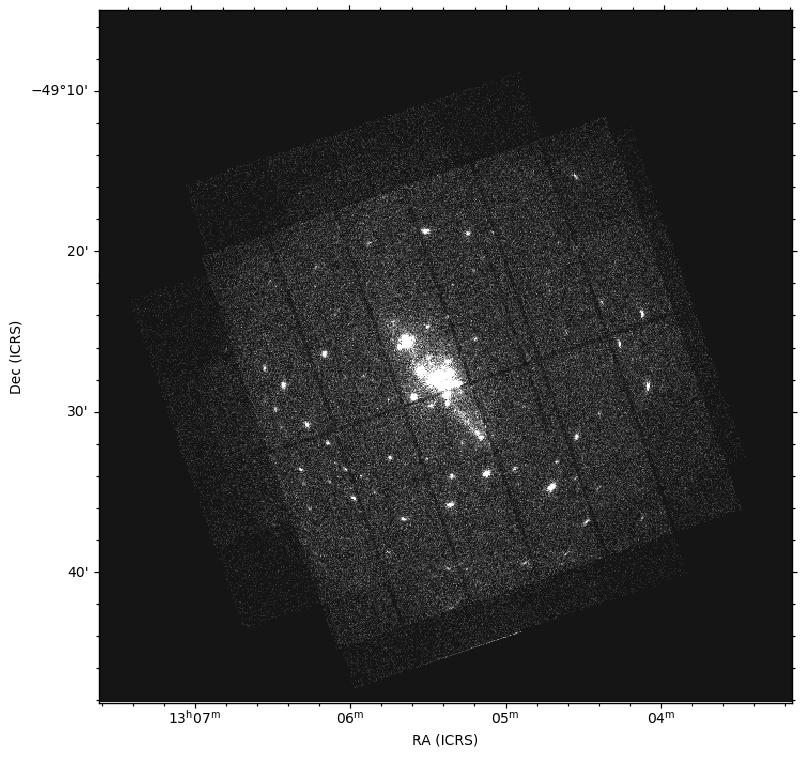

In [120]:
# Looking back at our table of links for the XMM observations, let's say we're interested in visualizing the science image from ObsID 0204870101. 
# Let's grab the S3 link to the data:
s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000OIMAGE8000.FTZ"
# where we have appended the file name "PPS" to the path (this is the directory housing the "*IMAGE8000.FTZ" file) as well as the wildcard argument needed to 
# grab the file we're interested in

# now we will use astropy.fits.io's open() function to stream our image file here
# and we will plot this with the convenient fits file/image plotting module `aplpy` which was pip installed above

with fits.open(s3_uri, fsspec_kwargs={"anon": True}) as hdul:
    gc = aplpy.FITSFigure(hdul[0])
    gc.show_grayscale()
    hdul.close()

# and voila! We can stream our high energy image data products right here using astropy.fits.io
# Note: if you stream data over that is an events list rather than a binned image, you will need to bin the image manually before plotting with aplpy or 
# simply with matplotlib. 

In [83]:
from astropy.io import fits
import ast
fs = s3fs.S3FileSystem(anon=True)

INFO: Auto-setting vmin to -1.200e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.332e+01 [aplpy.core]


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


[]


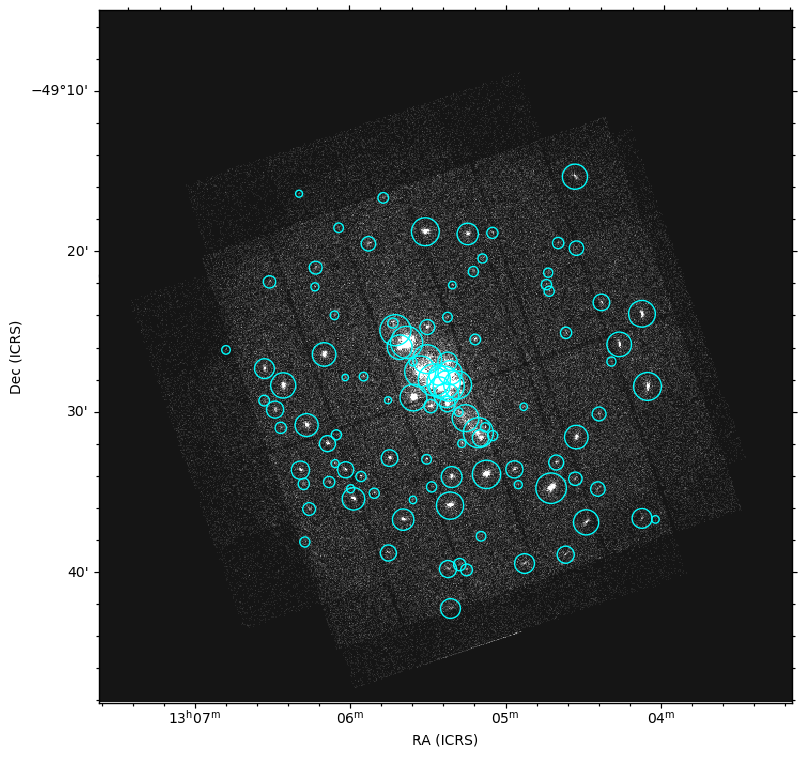

In [98]:
# additional, more powerful functionality can be obtained by using a combination of Heasarc astroquery commands and commands from s3fs. 
# For example, if we want to stream the science image from ObsID 0204870101 like we did above as well as overlay the detected sources in the observation
# (another data product from the PPS pipeline, with the label containing: "*REGION0000.ASC")

s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000OIMAGE8000.FTZ"
with fits.open(s3_uri, fsspec_kwargs={"anon": True}) as hdul:
    print(hdul)
    gc = aplpy.FITSFigure(hdul[0])
    gc.show_grayscale()
    hdul.close()
    s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000REGION0000.ASC"
    with fs.open(s3_uri, 'rb') as file:
        lines = file.readlines()
        regs = []
        for line in lines[2::1]: # we're skipping the first couple of lines because they are just DS9 specific commands
            line = (line[11:35:1]).decode('utf-8') # we have to decode the lines because they are being read in as bytes
            ra, dec, rad = line.split(",")
            #print(ra,dec,rad)
            # add commands here to plot regions
            gc.show_circles(float(ra), float(dec), radius=int(rad)/3600, color='cyan') # note: radius is given in units of degrees
            # this will take about 10-15s to plot everything because we're plotting one at a time


In [122]:
# Or, similarly, what if we only need a single file from an ObsID rather than the full ObsID contents? We could instead download files locally using s3fs.

# Take for example the region file we streamed using s3fs.open() in the previous plot. We could instead use s3fs.get() to download it locally.
# (and this goes for all files - we could get them using s3fs.get() )

# let's take a look at the files in the PPS directory on S3 using the following commands:
files = fs.ls(f"{links['aws'][0]}PPS")
print(files)

# like the `ls` command in terminal, this command shows you all of the contents of the PPS directory for ObsID 0204870101 in the S3 bucket

# we could instead use glob to grab just the region file we're interested in like so:
regs = fs.glob(f"{links['aws'][0]}PPS/*REGION*.ASC")
print(regs)

# this provides an additional method of looking through the directories of ObsIDs you're interested in

['nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000CATPLT0000.PDF', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D0001A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D0003A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D0011A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D0511T0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1252A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1259A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1284A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1297A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1305A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1322A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1345A0000.HTM', 'nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101CAX000D1836A0000.HTM'

['nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101EPX000REGION0000.ASC']


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.100e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.221e+01 [aplpy.core]


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


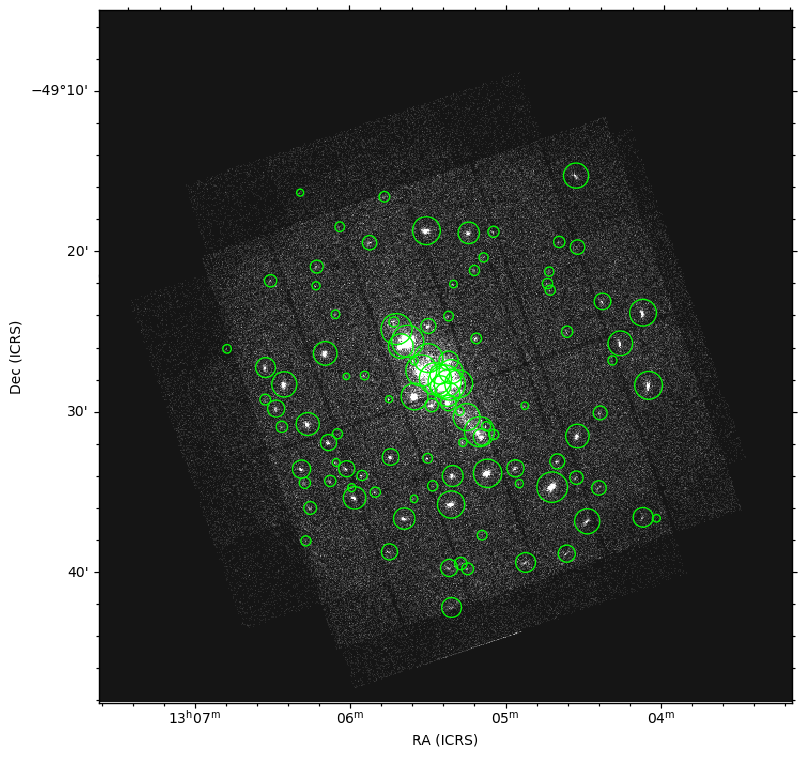

In [123]:
# if you wanted to copy the region locally, you could use the s3fs.get() command and plot the regions like so:
s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000REGION0000.ASC" # --> where we've grabbed the name of this file from output above
# we could have also used glob like above:
s3_uri = fs.glob(f"{links['aws'][0]}PPS/*REGION*.ASC")
print(s3_uri)

fs.get(s3_uri, './') # downloading a copy of the region file locally here on Fornax

s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000OIMAGE8000.FTZ"
with fits.open(s3_uri, fsspec_kwargs={"anon": True}) as hdul:
    gc = aplpy.FITSFigure(hdul[0])
    gc.show_grayscale()
    # aplpy has a convenient function for plotting regions from a ds9 region file.
    gc.show_regions("P0204870101EPX000REGION0000.ASC") # plotting the region file using aplpy's show_circles()
    hdul.close()



### Boom! Now we have a very basic visualization of both the observation and the detected sources in the observation. 

Further adjustments can be made to the image and the regions using <a href="https://aplpy.readthedocs.io/en/stable/">aplpy's build in functionality</a> as well as using matplotlib. 


In [60]:
# One final thing we can show here is how to visualize sources from the mission point source catalogs and overlap them on the streamed science image

# Let's take the XMM point source catalog as an example: we're going to use Heasarc.astroquery() 

# here we're going to use the query_region() function to search for sources within 10 arcmin of the position of NGC 4945 (where we're retrieving the position
# using the from_name() function in SkyCoord
from astropy import units as u

position = SkyCoord.from_name('ngc 4945')
sources = Heasarc.query_region(position, catalog='xmmssc', radius=10*u.arcmin, columns="*", get_query_payload=True)

print(sources)
# the above line generates an ADQL query 
# We can also print it out, modify it, and then reassign the variable 'sources', like:
query = """SELECT ra,dec,name,obsid FROM xmmssc
           WHERE CONTAINS(POINT('ICRS',ra,dec),CIRCLE('ICRS',196.3636625,-49.4679,0.16666666666666666))=1"""

# and then running this query:
tab = Heasarc.query_tap(query, ).to_table()
#tab[:10].pprint()

SELECT * FROM xmmssc WHERE CONTAINS(POINT('ICRS',ra,dec),CIRCLE('ICRS',196.3636625,-49.4679,0.16666666666666666))=1


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.110e+01 [aplpy.core]


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


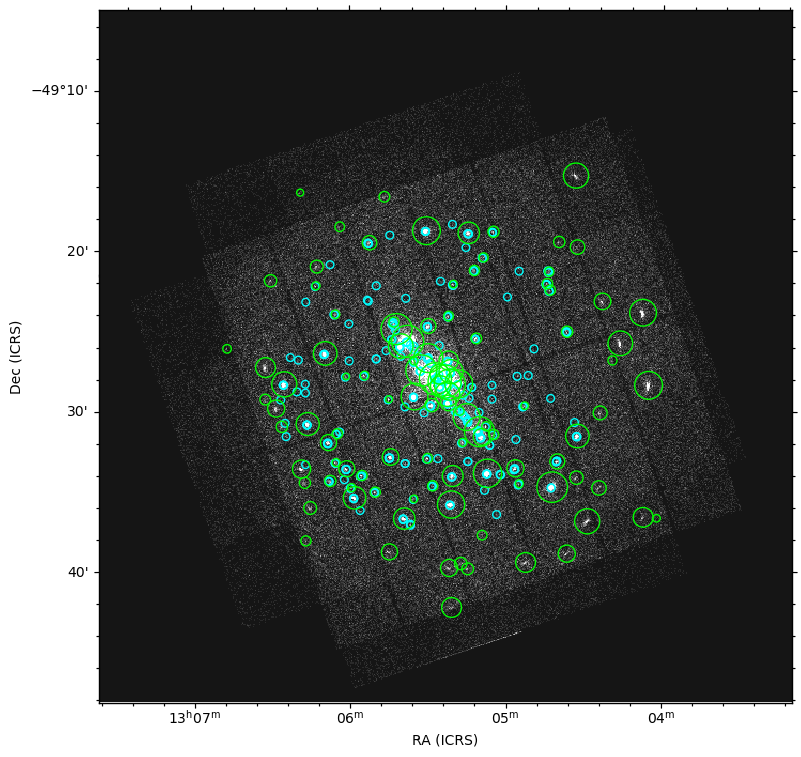

In [61]:
# and now we're going to stream the PPS file over from the 0204870101 event file and plot our sources using the add_region aplpy function

s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000OIMAGE8000.FTZ"

with fits.open(s3_uri, fsspec_kwargs={"anon": True}) as hdul:
    gc = aplpy.FITSFigure(hdul[0])
    gc.show_grayscale()
    gc.show_circles(tab['ra'], tab['dec'], radius=0.004, color='cyan')
    gc.show_regions("P0204870101EPX000REGION0000.ASC") 
    hdul.close()

# where we have plotted both the xmm point source catalog sources as well as the detected sources from the actual ObsID PPS region file purely for comparison purposes

# note that there are many sources detected in ObsID 0204870101 that are apparently not in the XMM serendipitous source catalog!


In [28]:
# now let's say instead of the XMM master catalog, which contains the distinct observations from XMM, we want the point source catalog instead
# the latest version of which is the 4XMM catalog

# we will check for XMM catalogs via the heasarc query again

catalogs = Heasarc.list_catalogs(master=False, keywords="xmm")
catalogs.pprint(max_lines=len(catalogs)+1)

   name                              description                           
---------- ----------------------------------------------------------------
agnsdssxm2 Sloan Digital Sky Survey/XMM-Newton Type1 AGN X-Ray and Radio Pr
agnsdssxmm Sloan Digital Sky Survey/XMM-Newton AGN Spectral Properties Cata
 alfperxmm           Alpha Per Open Cluster XMM-Newton X-Ray Source Catalog
      axis                                   AXIS XMM-Newton Source Catalog
     caixa                         Catalog of AGN in the XMM-Newton Archive
 carinaxmm     Carina OB1 Association XMM-Newton X-Ray Point Source Catalog
   cepaxmm              Cepheus A SFR XMM-Newton X-Ray Point Source Catalog
cfhtlsgxmm                 XMM-Newton CFHTLS W1 Field Galaxy Groups Catalog
 cmaob1nir CMa OB1 XMM-Newton Point Source Near-Infrared Counterpart Proper
 cmaob1xmm                    CMa OB1 XMM-Newton X-Ray Point Source Catalog
 coll69oid Collinder 69 Cluster Optical/IR Counterparts to XMM-Newton X-Ray
 coll69xmm  

In [29]:
# okay, and from this list we want to grab the XMM serendipitous source catalog (4XMM-DR14), which is named 'xmmssc'
# now we'll use the heasarc function locate_data() to find where the catalog is stored so we can query it

#catalogs = Heasarc.list_catalogs(master=False, keywords='xmmssc')
#links = Heasarc.locate_data(catalogs)
#
#links

# so it appears that the point source catalogs are not stored on S3? So instead we could just use the Heasarc query_region() function to query for sources in
# the vicinity of NGC 4945

link = fs.ls(f"s3://nasa-heasarc/xmm/data")
len(link)

5704

In [31]:
# here we're going to use the query_region() function to search for sources within 3 arcmin of the position of NGC 4945 (where we're retrieving the position
# using the from_name() function in SkyCoord
from astropy import units as u

position = SkyCoord.from_name('ngc 4945')
sources = Heasarc.query_region(position, catalog='xmmssc', radius=10*u.arcmin, columns="*", get_query_payload=True)

print(sources)
# the above line generates an ADQL query 
# We can also print it out, modify it, and then reassign the variable 'sources', like:
query = """SELECT ra,dec,name,obsid FROM xmmssc
           WHERE CONTAINS(POINT('ICRS',ra,dec),CIRCLE('ICRS',196.3636625,-49.4679,0.16666666666666666))=1"""

# and then running this query:
tab = Heasarc.query_tap(query, ).to_table()
#tab[:10].pprint()

SELECT * FROM xmmssc WHERE CONTAINS(POINT('ICRS',ra,dec),CIRCLE('ICRS',196.3636625,-49.4679,0.16666666666666666))=1


In [32]:
# printing out the length of the table returned, which is the number of sources in the event list
len(tab)

304

In [27]:
# for kicks, we're going to also import the IRSA package and grab a source list from AllWISE to overlay on the XMM image
from astroquery.ipac.irsa import Irsa
#Irsa.list_catalogs(filter='wise')
wise = Irsa.query_region(coordinates=position, spatial='Cone', catalog='allwise_p3as_psd', radius=10*u.arcmin)
wise = wise[(wise['w1snr']>15) & (wise['w2snr']>15)]

In [28]:
print(len(wise))
wise

694


designation,ra,dec,sigra,sigdec,sigradec,glon,glat,elon,elat,wx,wy,cntr,source_id,coadd_id,src,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,satnum,ra_pm,dec_pm,sigra_pm,sigdec_pm,sigradec_pm,pmra,sigpmra,pmdec,sigpmdec,w1rchi2_pm,w2rchi2_pm,w3rchi2_pm,w4rchi2_pm,rchi2_pm,pmcode,cc_flags,rel,ext_flg,var_flg,ph_qual,det_bit,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m,w1cov,w2cov,w3cov,w4cov,w1cc_map,w1cc_map_str,w2cc_map,w2cc_map_str,w3cc_map,w3cc_map_str,w4cc_map,w4cc_map_str,best_use_cntr,ngrp,w1flux,w1sigflux,w1sky,w1sigsk,w1conf,w2flux,w2sigflux,w2sky,w2sigsk,w2conf,w3flux,w3sigflux,w3sky,w3sigsk,w3conf,w4flux,w4sigflux,w4sky,w4sigsk,w4conf,w1mag,w1sigm,w1flg,w1mcor,w2mag,w2sigm,w2flg,w2mcor,w3mag,w3sigm,w3flg,w3mcor,w4mag,w4sigm,w4flg,w4mcor,w1mag_1,w1sigm_1,w1flg_1,w2mag_1,w2sigm_1,w2flg_1,w3mag_1,w3sigm_1,w3flg_1,w4mag_1,w4sigm_1,w4flg_1,w1mag_2,w1sigm_2,w1flg_2,w2mag_2,w2sigm_2,w2flg_2,w3mag_2,w3sigm_2,w3flg_2,w4mag_2,w4sigm_2,w4flg_2,w1mag_3,w1sigm_3,w1flg_3,w2mag_3,w2sigm_3,w2flg_3,w3mag_3,w3sigm_3,w3flg_3,w4mag_3,w4sigm_3,w4flg_3,w1mag_4,w1sigm_4,w1flg_4,w2mag_4,w2sigm_4,w2flg_4,w3mag_4,w3sigm_4,w3flg_4,w4mag_4,w4sigm_4,w4flg_4,w1mag_5,w1sigm_5,w1flg_5,w2mag_5,w2sigm_5,w2flg_5,w3mag_5,w3sigm_5,w3flg_5,w4mag_5,w4sigm_5,w4flg_5,w1mag_6,w1sigm_6,w1flg_6,w2mag_6,w2sigm_6,w2flg_6,w3mag_6,w3sigm_6,w3flg_6,w4mag_6,w4sigm_6,w4flg_6,w1mag_7,w1sigm_7,w1flg_7,w2mag_7,w2sigm_7,w2flg_7,w3mag_7,w3sigm_7,w3flg_7,w4mag_7,w4sigm_7,w4flg_7,w1mag_8,w1sigm_8,w1flg_8,w2mag_8,w2sigm_8,w2flg_8,w3mag_8,w3sigm_8,w3flg_8,w4mag_8,w4sigm_8,w4flg_8,w1magp,w1sigp1,w1sigp2,w1k,w1ndf,w1mlq,w1mjdmin,w1mjdmax,w1mjdmean,w2magp,w2sigp1,w2sigp2,w2k,w2ndf,w2mlq,w2mjdmin,w2mjdmax,w2mjdmean,w3magp,w3sigp1,w3sigp2,w3k,w3ndf,w3mlq,w3mjdmin,w3mjdmax,w3mjdmean,w4magp,w4sigp1,w4sigp2,w4k,w4ndf,w4mlq,w4mjdmin,w4mjdmax,w4mjdmean,rho12,rho23,rho34,q12,q23,q34,xscprox,w1rsemi,w1ba,w1pa,w1gmag,w1gerr,w1gflg,w2rsemi,w2ba,w2pa,w2gmag,w2gerr,w2gflg,w3rsemi,w3ba,w3pa,w3gmag,w3gerr,w3gflg,w4rsemi,w4ba,w4pa,w4gmag,w4gerr,w4gflg,tmass_key,r_2mass,pa_2mass,n_2mass,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,x,y,z,spt_ind,htm20
,deg,deg,arcsec,arcsec,arcsec,deg,deg,deg,deg,pix,pix,,,,,mag,mag,,,mag,mag,,,mag,mag,,,mag,mag,,,,,,,,,,,deg,deg,arcsec,arcsec,arcsec,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,mag,mag,,mag,mag,mag,,mag,mag,mag,,mag,mag,mag,,mag,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,mag,,,,,,,mag,mag,mag,,,,,,,mag,mag,mag,,,,,,,mag,mag,mag,,,,,,,,,,,,,arcsec,arcsec,,deg,mag,mag,,arcsec,,deg,mag,mag,,arcsec,,deg,mag,mag,,arcsec,,deg,mag,mag,,,arcsec,deg,,mag,mag,mag,mag,mag,mag,,,,,
object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object,object,int64,float32,float32,float64,float32,float32,float32,float64,float32,float32,float32,float64,float32,float32,float32,float64,float32,float32,int64,int64,float32,float32,float32,float32,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,float32,float32,float32,float32,float32,object,object,object,int64,object,object,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,int64,object,int64,object,int64,object,int64,object,int64,int32,float32,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,int64,float32,float32,float32,int64,float32,float32,float32,int64,float32,float3

In [29]:
len(wise)

694

In [45]:
import os

In [34]:
# here I'm going to try to stream the region file from the PPS directory of ObsID 0204870101
#regions = glob(str(PPS_path)+'*REGION*')[0]

regs = fs.glob(f"{links['aws'][0]}PPS/*REGION*.ASC")
print(regs[0])

s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000REGION0000.ASC"
print(s3_uri)

# fs.get(s3_uri, './')
# I copied the file over from S3 instead of trying to stream it here


nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101EPX000REGION0000.ASC
s3://nasa-heasarc/xmm/data/rev0/0204870101/PPS/P0204870101EPX000REGION0000.ASC


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.100e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.221e+01 [aplpy.core]


Set MJD-END to 53014.807292 from DATE-END'. [astropy.wcs.wcs]


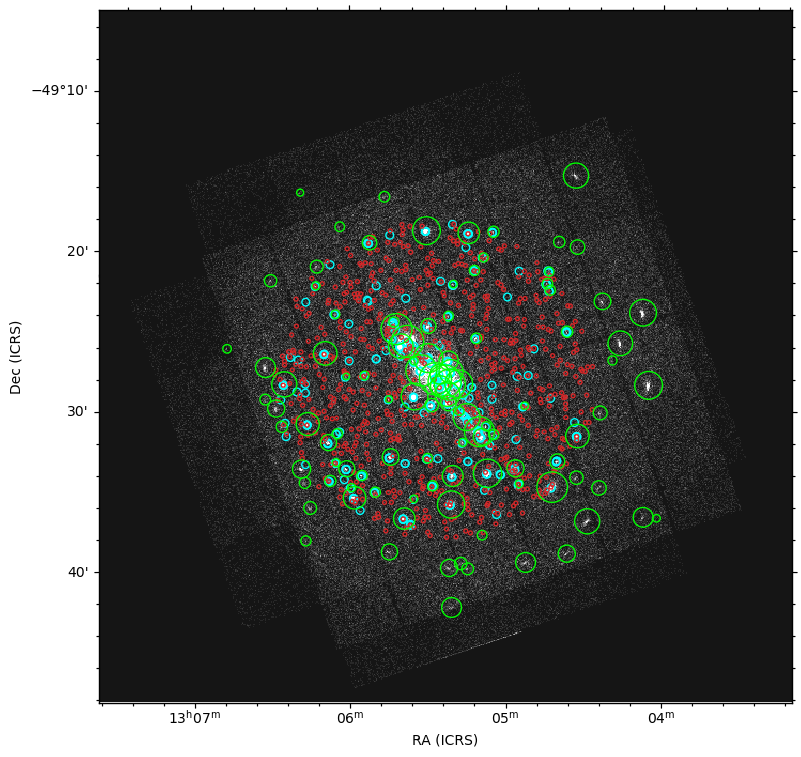

In [69]:
# and now we're going to stream the PPS file over from the 0204870101 event file and plot our sources using the add_region aplpy function

s3_uri = f"{links['aws'][0]}PPS/P0204870101EPX000OIMAGE8000.FTZ"
#s3://nasa-heasarc/chandra/data/byobsid/{val}/{obsid}/primary/

with fits.open(s3_uri, fsspec_kwargs={"anon": True}) as hdul:
    print(hdul)
    # now trying to plot with aplpy (and it works!!)
    #path = fs.glob(f"{s3_uri}/*full_img2*.fits.gz")
    #print(path)
    gc = aplpy.FITSFigure(hdul[0])
    gc.show_grayscale()
    #for i,j in zip(tab['ra'],tab['dec']):
    #    gc.show_circles(i, j, radius=0.004, color='cyan')
    gc.show_circles(tab['ra'], tab['dec'], radius=0.004, color='cyan')
    gc.show_circles(wise['ra'], wise['dec'], radius=0.002, color='tab:red')
    gc.show_regions("P0204870101EPX000REGION0000.ASC") #'P0204870101EPX000REGION0000.ASC')
    hdul.close()
